Calling FFC just-in-time (JIT) compiler, this may take some time.


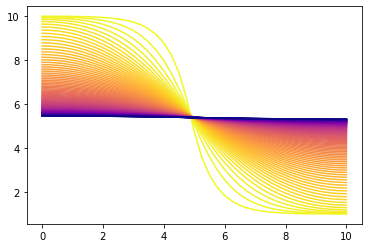

In [30]:
from fenics import *
import numpy as np
import scipy.interpolate as spip
import matplotlib.pyplot as plt


tmax = 45
num_steps = 100
dt = tmax/num_steps


mesh = IntervalMesh(40, 0, 10)
V = FunctionSpace(mesh, 'P', 1)
Ti = Expression("1.0 + 9.0*(x[0]<5.0)", degree = 0) #Initial temperature profile (discontinuous)

T_n = interpolate(Ti, V) #Initial temperature function

T =TrialFunction(V)
v = TestFunction(V)

F = T*v*dx + dt*dot(grad(T), grad(v))*dx - T_n*v*dx #Variational formulation
a, L = lhs(F), rhs(F)

T = Function(V)
t = 0
p = plt.get_cmap('plasma')
for n in range(num_steps):
    t = t+dt
    solve(a==L, T)
    plot(T, color = p(1-n/(num_steps-1)))
    T_n.assign(T)